<a href="https://colab.research.google.com/github/helmana/DLeeg/blob/master/Comparison/sample%20per%20window/proposed_model_Orth%203ch_109s_2%20task%20for%20test_(160%2C480%2C960)sample%20per%20window.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''
109 subject
3 channel (61, 33, 37)
train task: REO 
test task_1 : REO
test task_2 : REC

epoch: 50
seed = 14

**sample per window = 160 :

TrainResult ([loss , acc])= [0.00032630152952211125, 0.9998851102941176]
ValidationResult ([loss , acc])= [0.0007759822832702831, 0.9997387123745819]
TestResult_task1 ([loss , acc])= [0.0002903900352064295, 0.9999222636815921]
TestResult_task2 ([loss , acc])= [11.824917982120326, 0.17744430693069307]
----------------------------

**sample per window = 480 :

TrainResult ([loss , acc])= [0.0006189859408593523, 0.9997945501730103]
ValidationResult ([loss , acc])= [0.0007988805133035312, 0.9998372395833334]
TestResult_task1 ([loss , acc])= [0.0005038948625440299, 0.9997596153846153]
TestResult_task2 ([loss , acc])= [12.340116356358383, 0.17755681818181818]
----------------------------

**sample per window = 960 :

TrainResult ([loss , acc])= [5.117088696703555e-06, 1.0]
ValidationResult ([loss , acc])= [8.276135314753074e-06, 1.0]
TestResult_task1 ([loss , acc])= [7.425577627180903e-06, 1.0]
TestResult_task2 ([loss , acc])= [12.255286872957702, 0.17230249658002736]


'''


'\nbest channel (Oz)\nepoch: 120\n\nTrainResult ([loss , acc])= [0.018957456561174885, 0.9955648194583752]\nValidationResult ([loss , acc])= [0.0443783304768607, 0.9868850401606426]\nTestResult ([loss , acc])= [0.04897509974022275, 0.984312624750499]\n\n'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install mne

     |████████████████████████████████| 6.4MB 3.9MB/s 


In [0]:
'''
Rivision:
980806:
  First version.
  
  

'''

'\nRivision:\n980806:\n  First version.\n  \n  \n\n'

In [0]:
# Parameters:

EpochNum=50
subject_number=109
RemoveBaseLine=0
Orthogonal=1
list_channel=[61,33,37]  #Oz
ch_number=len(list_channel)

TryStr='Try1'
seed = 14

task_index = [1,2] # task: REO, REC
train_task = 0
test_task = 1

task_number= len(task_index)
task_time = 60
sampel_number_per_sec =  160 # sampel rate
total_sampel_number =  sampel_number_per_sec *task_time # 60*160

sample_per_window = 480 # 160 * 12 s
inner_sample_shift = 4 # inner step len
outer_train_sample_shift =8  # train outer step len
outer_test_sample_shift = sample_per_window  # test outer step len

window_len= 20
batch_size=64

Search_Space_Channel = [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]
Search_Space_Channel_Name=["Fp1","Fp2","F7","F3","Fz","F4","F8","T7","C3","Cz","C4","T8","P7","P3","Pz","P4","P8","O1","Oz","O2"]



In [5]:
# For Visualization
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa

# General use
import numpy as np
import math
import random


# For model training
from keras import layers
from keras import models
from keras import regularizers
from keras.utils import to_categorical
from keras import optimizers
from keras import backend as KerasBackend


# EEG Tools
import mne
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
from mne import io
from mne import viz
from mne import Epochs, io, pick_types
from mne.event import define_target_events
from mne.time_frequency import psd_welch
print(__doc__)



Using TensorFlow backend.


/usr/local/lib/python3.6/dist-packages/numba/decorators.py:146: RuntimeWarning: Caching is not available when the 'parallel' target is in use. Caching is now being disabled to allow execution to continue.
  warnings.warn(msg, RuntimeWarning)


Automatically created module for IPython interactive environment


In [6]:
# load dataset in array
task_number= len(task_index)

# load dataset in array
list_raw_fnames = [[0]*task_number]*subject_number
for x in range(subject_number):
  list_raw_fnames[x] = mne.datasets.eegbci.load_data(x+1,task_index,path='/content/drive/My Drive/Deep Results/Database')

list_rawdata = np.zeros((subject_number,task_number), dtype='object')

for i in range(subject_number):
  for j in range(task_number):
    list_rawdata[i][j] = mne.io.read_raw_edf(list_raw_fnames[i][j], preload=True)


Do you want to set the path:
    /content/drive/My Drive/Deep Results/Database
as the default EEGBCI dataset path in the mne-python config [y]/n? y
Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.in

In [62]:
# img for each subject
train_subject_img_number = math.floor((total_sampel_number - sample_per_window - (window_len-1 )*inner_sample_shift) / outer_train_sample_shift) +1
test_subject_img_number = math.floor((total_sampel_number - sample_per_window - (window_len-1 )*inner_sample_shift) / outer_test_sample_shift) +1

np.random.seed(seed)  

# subject number
subject_number_array_shuffled=np.arange(subject_number)
np.random.shuffle(subject_number_array_shuffled)

# train img index suff
train_subject_img_number_array_shuffled=np.arange(train_subject_img_number)
np.random.shuffle(train_subject_img_number_array_shuffled)

# test img index suff
test_subject_img_number_array_shuffled=np.arange(test_subject_img_number)
np.random.shuffle(test_subject_img_number_array_shuffled)

# train , val , test index 
train_index = math.floor(len(train_subject_img_number_array_shuffled) * 0.75)
val_index = train_index + train_index//5


train_shuff = train_subject_img_number_array_shuffled[:train_index]
val_shuff = train_subject_img_number_array_shuffled[train_index:val_index]
# test task 1 (train task: REO)
test_shuff1 = train_subject_img_number_array_shuffled[val_index:]
# test task 2 (REC)
test_shuff2 = test_subject_img_number_array_shuffled[:]

train_number = len(train_shuff)
val_number = len(val_shuff)
test_number1 = len(test_shuff1)
test_number2 = len(test_shuff2)

print(train_number , val_number, test_number1, test_number2)
train_subject_img_number

803 160 108 1071


1071

In [0]:
def normalize_channel_data(ch , i, ch_min, ch_max):
  ch = ((ch - ch_min[i]) / (ch_max[i] - ch_min[i] ))
  return ch

def ProjectionVector(VecA,VecB):
    Projeted_VecB_on_VecA=np.dot(VecA,VecB)/np.dot(VecA,VecA)*VecA
    return Projeted_VecB_on_VecA

In [0]:
#################################################################################################
## Define General Data Generator
def GenerateGeneralData(task,BatchSize,ListRawDataMain,SubjectArrayShuffled,ListChannel,RemoveBaseLineFlag,OrthogonalFlag,ImageArrayShuffled,WindowLen,OuterSampleShift,InnerSampleShift,SampelNumberPerSec):
    
    Iter=0
    #ch_number=len(ListChannel)
    
    
    ##########################################################
    # Pre-Proceesing On Raw Data
    ListRawDataTemp=ListRawDataMain.copy()
    
    DataAllChannelsRawPerSubject, times =(ListRawDataTemp[0][task][:64,:9600])

    DataChannelsRaw   =np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    DataChannelsNormal=np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    DataChannelsOrt   =np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
        
    for s in SubjectArrayShuffled:

        DataAllChannelsRawPerSubject, times =(ListRawDataTemp[s][task][:64,:9600])
        
        # Extrac Channel T9 or T10 as Baseline
        DataChannelT9Raw =DataAllChannelsRawPerSubject[43]# Ch T9 (42) or T10 (43)


        ch_max =[]
        ch_min =[]
        # Extract Selected Channels+ Remove Baseline+ Normailze
        for i in range(len(ListChannel)):
            DataChannelsRaw[s][i]=DataAllChannelsRawPerSubject[ListChannel[i]].copy() -DataChannelT9Raw*RemoveBaseLineFlag

            ch_max = np.append(ch_max, max(DataChannelsRaw[s][i])) # max for each cannel
            ch_min = np.append(ch_min, min(DataChannelsRaw[s][i])) # min for each cannel

            DataChannelsNormal[s][i]=normalize_channel_data(DataChannelsRaw[s][i].copy(), i, ch_min, ch_max)


        # Orthogonal Channel
        #DataChannelsOrt[s][0]=DataChannelsNormal[s][0]
        #DataChannelsOrt[s][1]=DataChannelsNormal[s][1]-ProjectionVector(DataChannelsNormal[s][0].copy(),DataChannelsNormal[s][1].copy())*OrthogonalFlag
        
        DataChannelsOrt[s][0]=DataChannelsNormal[s][0]
        DataChannelsOrt[s][1]=DataChannelsNormal[s][1]-ProjectionVector(DataChannelsOrt[s][0].copy(),DataChannelsNormal[s][1].copy())*OrthogonalFlag
        DataChannelsOrt[s][2]=DataChannelsNormal[s][2]-ProjectionVector(DataChannelsOrt[s][0].copy(),DataChannelsNormal[s][2].copy())*OrthogonalFlag\
                                                      -ProjectionVector(DataChannelsOrt[s][1].copy(),DataChannelsNormal[s][2].copy())*OrthogonalFlag
        
        
    ##########################################################
    # Generate Data for Network
    while True:

      for j in ImageArrayShuffled:
          for s in SubjectArrayShuffled:

              if Iter ==0:
                  TrainImage=np.zeros((BatchSize, ch_number, WindowLen, sample_per_window), dtype = float)
                  TrainLabel=np.zeros((BatchSize),dtype=int)

              for i in range(len(ListChannel)):
                  for z in range (WindowLen):
                      ExtractedData = DataChannelsOrt[s][i][0+j*OuterSampleShift + z*InnerSampleShift:sample_per_window+ j*OuterSampleShift + z*InnerSampleShift]
                      TrainImage[Iter][i][z] = ExtractedData.copy()# Data

              TrainLabel[Iter] = s # label

              Iter=Iter+1
              #Count=Count+1
              if Iter==BatchSize:
                Iter=0
                #print('Count=',Count)
                TrainLabelClass=to_categorical(TrainLabel,len(SubjectArrayShuffled))
                TI = np.moveaxis(TrainImage, 1, -1)
                yield TI, TrainLabelClass 

                

In [0]:
#####################################################################################################

# Reset Model and Data Arrays

list_rawdataTemp=list_rawdata.copy()

    
#################################################################################################
# Construct Data Generator

GenTrainData=GenerateGeneralData( task= train_task,
                                  BatchSize=batch_size,
                                  ListRawDataMain=list_rawdataTemp.copy(),
                                  SubjectArrayShuffled=subject_number_array_shuffled,
                                  ListChannel=list_channel,
                                  RemoveBaseLineFlag=RemoveBaseLine,
                                  OrthogonalFlag=Orthogonal,
                                  WindowLen=window_len,
                                  OuterSampleShift=outer_train_sample_shift,
                                  InnerSampleShift=inner_sample_shift,
                                  SampelNumberPerSec=sampel_number_per_sec,
                                  ImageArrayShuffled=train_shuff)

GenValidationData =GenerateGeneralData( task= train_task,
                                        BatchSize=batch_size,
                                        ListRawDataMain=list_rawdataTemp.copy(),
                                        SubjectArrayShuffled=subject_number_array_shuffled,
                                        ListChannel=list_channel,
                                        RemoveBaseLineFlag=RemoveBaseLine,
                                        OrthogonalFlag=Orthogonal,
                                        WindowLen=window_len,
                                        OuterSampleShift=outer_train_sample_shift,
                                        InnerSampleShift=inner_sample_shift,
                                        SampelNumberPerSec=sampel_number_per_sec,
                                        ImageArrayShuffled=val_shuff)

GenTestData_task1=GenerateGeneralData(task= train_task,
                                      BatchSize=batch_size,
                                      ListRawDataMain=list_rawdataTemp.copy(),
                                      SubjectArrayShuffled=subject_number_array_shuffled,
                                      ListChannel=list_channel,
                                      RemoveBaseLineFlag=RemoveBaseLine,
                                      OrthogonalFlag=Orthogonal,
                                      WindowLen=window_len,
                                      OuterSampleShift=outer_train_sample_shift,
                                      InnerSampleShift=inner_sample_shift,
                                      SampelNumberPerSec=sampel_number_per_sec,
                                      ImageArrayShuffled=test_shuff1)

GenTestData_task2=GenerateGeneralData(task= test_task,
                                      BatchSize=batch_size,
                                      ListRawDataMain=list_rawdataTemp.copy(),
                                      SubjectArrayShuffled=subject_number_array_shuffled,
                                      ListChannel=list_channel,
                                      RemoveBaseLineFlag=RemoveBaseLine,
                                      OrthogonalFlag=Orthogonal,
                                      WindowLen=window_len,
                                      OuterSampleShift=outer_test_sample_shift,
                                      InnerSampleShift=inner_sample_shift,
                                      SampelNumberPerSec=sampel_number_per_sec,
                                      ImageArrayShuffled=test_shuff2)

#################################################################################################
# Create Model
model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), activation = 'relu', padding='same', input_shape = (window_len,sample_per_window,ch_number)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(subject_number, activation = 'softmax'))

model.compile(loss= 'categorical_crossentropy',
              optimizer= optimizers.RMSprop(lr= 1e-4),
              metrics = ['acc'])


Epoch 1/50
1496/1496 [==============================] - 38s 25ms/step - loss: 3.7624 - acc: 0.0941 - val_loss: 2.8069 - val_acc: 0.2541
Epoch 2/50
1496/1496 [==============================] - 36s 24ms/step - loss: 2.6422 - acc: 0.2543 - val_loss: 1.8662 - val_acc: 0.5238
Epoch 3/50
1496/1496 [==============================] - 36s 24ms/step - loss: 1.8560 - acc: 0.4383 - val_loss: 1.5287 - val_acc: 0.5310
Epoch 4/50
1496/1496 [==============================] - 37s 25ms/step - loss: 1.3571 - acc: 0.5706 - val_loss: 0.9417 - val_acc: 0.7230
Epoch 5/50
1496/1496 [==============================] - 37s 25ms/step - loss: 1.0479 - acc: 0.6630 - val_loss: 0.6178 - val_acc: 0.8238
Epoch 6/50
1496/1496 [==============================] - 36s 24ms/step - loss: 0.8230 - acc: 0.7333 - val_loss: 0.5351 - val_acc: 0.8387
Epoch 7/50
1496/1496 [==============================] - 36s 24ms/step - loss: 0.6459 - acc: 0.7917 - val_loss: 0.4041 - val_acc: 0.8766
Epoch 8/50
1496/1496 [==========================

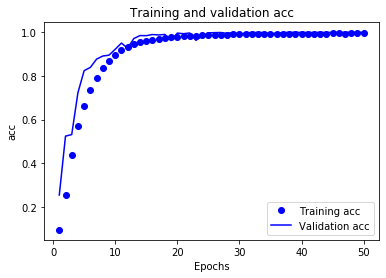

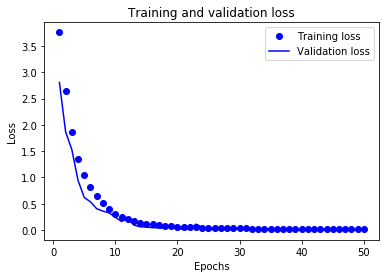

In [38]:

#################################################################################################
# Train the Model
history = model.fit_generator(epochs =EpochNum,
                              generator=GenTrainData,
                              steps_per_epoch=np.ceil(train_number*subject_number/batch_size),
                              validation_data=GenValidationData,
                              validation_steps =np.ceil(val_number*subject_number/batch_size),
                              use_multiprocessing=False,
                              workers=1)

#################################################################################################
# Evalute the Model
TrainResult      =model.evaluate_generator(GenTrainData,steps=np.ceil(train_number*subject_number/batch_size))
ValidationResult =model.evaluate_generator(GenValidationData,steps=np.ceil(val_number*subject_number/batch_size))
TestResult_task1 =model.evaluate_generator(GenTestData_task1,steps=np.ceil(test_number1*subject_number/batch_size))
TestResult_task2 =model.evaluate_generator(GenTestData_task2,steps=np.ceil(test_number2*subject_number/batch_size))

print('     TrainResult ([loss , acc])=',TrainResult)
print('ValidationResult ([loss , acc])=',ValidationResult)
print('TestResult_task1 ([loss , acc])=',TestResult_task1)
print('TestResult_task2 ([loss , acc])=',TestResult_task2)


#################################################################################################
# plot accuracy
history_dict = history.history 
acc_values = history_dict ['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)


#plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation acc') 
plt.xlabel('Epochs') 
plt.ylabel('acc') 
plt.legend()
plt.show()

history_dict = history.history 
loss_values = history_dict ['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()

In [0]:
GenTestData_task2=GenerateGeneralData(task= test_task,
                                      BatchSize=batch_size,
                                      ListRawDataMain=list_rawdataTemp.copy(),
                                      SubjectArrayShuffled=subject_number_array_shuffled,
                                      ListChannel=list_channel,
                                      RemoveBaseLineFlag=RemoveBaseLine,
                                      OrthogonalFlag=Orthogonal,
                                      WindowLen=window_len,
                                      OuterSampleShift=8,
                                      InnerSampleShift=inner_sample_shift,
                                      SampelNumberPerSec=sampel_number_per_sec,
                                      ImageArrayShuffled=test_shuff2)
TestResult_task2 =model.evaluate_generator(GenTestData_task2,steps=np.ceil(test_number2*subject_number/batch_size))


In [44]:
print('TestResult_task2 ([loss , acc])=',TestResult_task2)


TestResult_task2 ([loss , acc])= [11.831334332057407, 0.17526629072681704]


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 20, 480, 64)       1792      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 10, 240, 64)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 238, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 4, 119, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 2, 117, 256)       295168    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 1, 58, 256)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 14848)            

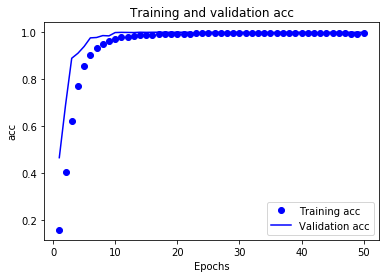

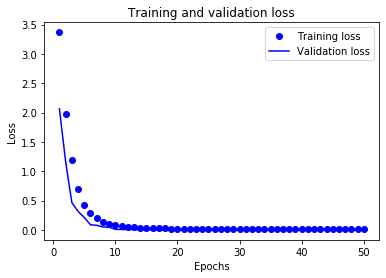

In [51]:
model.summary()
#################################################################################################
# Train the Model
history = model.fit_generator(epochs =EpochNum,
                              generator=GenTrainData,
                              steps_per_epoch=np.ceil(train_number*subject_number/batch_size),
                              validation_data=GenValidationData,
                              validation_steps =np.ceil(val_number*subject_number/batch_size),
                              use_multiprocessing=False,
                              workers=1)

#################################################################################################
# Evalute the Model
TrainResult      =model.evaluate_generator(GenTrainData,steps=np.ceil(train_number*subject_number/batch_size))
ValidationResult =model.evaluate_generator(GenValidationData,steps=np.ceil(val_number*subject_number/batch_size))
TestResult_task1 =model.evaluate_generator(GenTestData_task1,steps=np.ceil(test_number1*subject_number/batch_size))
TestResult_task2 =model.evaluate_generator(GenTestData_task2,steps=np.ceil(test_number2*subject_number/batch_size))

print('     TrainResult ([loss , acc])=',TrainResult)
print('ValidationResult ([loss , acc])=',ValidationResult)
print('TestResult_task1 ([loss , acc])=',TestResult_task1)
print('TestResult_task2 ([loss , acc])=',TestResult_task2)


#################################################################################################
# plot accuracy
history_dict = history.history 
acc_values = history_dict ['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)


#plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation acc') 
plt.xlabel('Epochs') 
plt.ylabel('acc') 
plt.legend()
plt.show()

history_dict = history.history 
loss_values = history_dict ['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()

In [55]:
GenTestData_task2=GenerateGeneralData(task= test_task,
                                      BatchSize=batch_size,
                                      ListRawDataMain=list_rawdataTemp.copy(),
                                      SubjectArrayShuffled=subject_number_array_shuffled,
                                      ListChannel=list_channel,
                                      RemoveBaseLineFlag=RemoveBaseLine,
                                      OrthogonalFlag=Orthogonal,
                                      WindowLen=window_len,
                                      OuterSampleShift=8,
                                      InnerSampleShift=inner_sample_shift,
                                      SampelNumberPerSec=sampel_number_per_sec,
                                      ImageArrayShuffled=test_shuff2)
TestResult_task2 =model.evaluate_generator(GenTestData_task2,steps=np.ceil(test_number2*subject_number/batch_size))

print('TestResult_task2 ([loss , acc])=',TestResult_task2)



TestResult_task2 ([loss , acc])= [12.361186610025387, 0.17713738972496107]


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 20, 960, 64)       1792      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 10, 480, 64)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 8, 478, 128)       73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 4, 239, 128)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 2, 237, 256)       295168    
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 1, 118, 256)       0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 30208)           

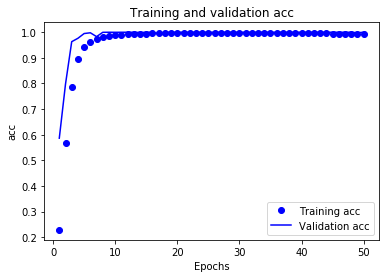

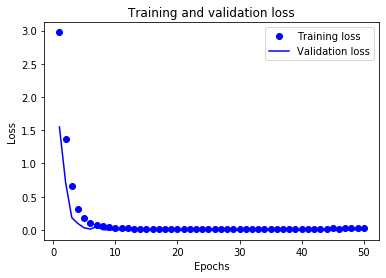

In [60]:
model.summary()

#################################################################################################
# Train the Model
history = model.fit_generator(epochs =EpochNum,
                              generator=GenTrainData,
                              steps_per_epoch=np.ceil(train_number*subject_number/batch_size),
                              validation_data=GenValidationData,
                              validation_steps =np.ceil(val_number*subject_number/batch_size),
                              use_multiprocessing=False,
                              workers=1)

#################################################################################################
# Evalute the Model
TrainResult      =model.evaluate_generator(GenTrainData,steps=np.ceil(train_number*subject_number/batch_size))
ValidationResult =model.evaluate_generator(GenValidationData,steps=np.ceil(val_number*subject_number/batch_size))
TestResult_task1 =model.evaluate_generator(GenTestData_task1,steps=np.ceil(test_number1*subject_number/batch_size))
TestResult_task2 =model.evaluate_generator(GenTestData_task2,steps=np.ceil(test_number2*subject_number/batch_size))

print('     TrainResult ([loss , acc])=',TrainResult)
print('ValidationResult ([loss , acc])=',ValidationResult)
print('TestResult_task1 ([loss , acc])=',TestResult_task1)
print('TestResult_task2 ([loss , acc])=',TestResult_task2)


#################################################################################################
# plot accuracy
history_dict = history.history 
acc_values = history_dict ['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)


#plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation acc') 
plt.xlabel('Epochs') 
plt.ylabel('acc') 
plt.legend()
plt.show()

history_dict = history.history 
loss_values = history_dict ['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()

In [65]:
GenTestData_task2=GenerateGeneralData(task= test_task,
                                      BatchSize=batch_size,
                                      ListRawDataMain=list_rawdataTemp.copy(),
                                      SubjectArrayShuffled=subject_number_array_shuffled,
                                      ListChannel=list_channel,
                                      RemoveBaseLineFlag=RemoveBaseLine,
                                      OrthogonalFlag=Orthogonal,
                                      WindowLen=window_len,
                                      OuterSampleShift=8,
                                      InnerSampleShift=inner_sample_shift,
                                      SampelNumberPerSec=sampel_number_per_sec,
                                      ImageArrayShuffled=test_shuff2)
TestResult_task2 =model.evaluate_generator(GenTestData_task2,steps=np.ceil(test_number2*subject_number/batch_size))

print('TestResult_task2 ([loss , acc])=',TestResult_task2)



TestResult_task2 ([loss , acc])= [12.255381808346264, 0.17250856164383563]
